In [1]:
import numpy as np
from astropy.cosmology import FlatLambdaCDM, z_at_value
import astropy.units as u
import matplotlib.pyplot as plt
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
c = 299792.458

Simulate a uniform survey of galaxies

In [2]:
np.random.seed(42)
num_galaxies = 1000
distances = np.random.uniform(0, 300, num_galaxies)

Convert distance to cosmological redshifts

In [3]:
z_bar = z_at_value(cosmo.comoving_distance, distances* u.Mpc,zmin=-0.1)

Randomly assign pv to each of these galaxies in your survey 

In [4]:
peculiar_velocities = np.random.uniform(-250., 250., num_galaxies)
#peculiar_velocities = 250.

calculate the total observed redshift based on z bar and z pv

In [5]:
z_total = (z_bar + 1.) * ( (peculiar_velocities / c) + 1. ) - 1.

Calculate the distance modulus and residuals 

In [6]:
mu_true = 5.*np.log10(cosmo.luminosity_distance(z_bar).value)

mu_obs = 5.*np.log10(cosmo.luminosity_distance(z_total).value)

residuals = mu_obs - mu_true

/var/folders/gm/yvqnp52d0dg0c6rgvbs833xh0000gp/T/ipykernel_19145/4217995733.py:3: RuntimeWarning: invalid value encountered in log10
  mu_obs = 5.*np.log10(cosmo.luminosity_distance(z_total).value)


Plot the residuals

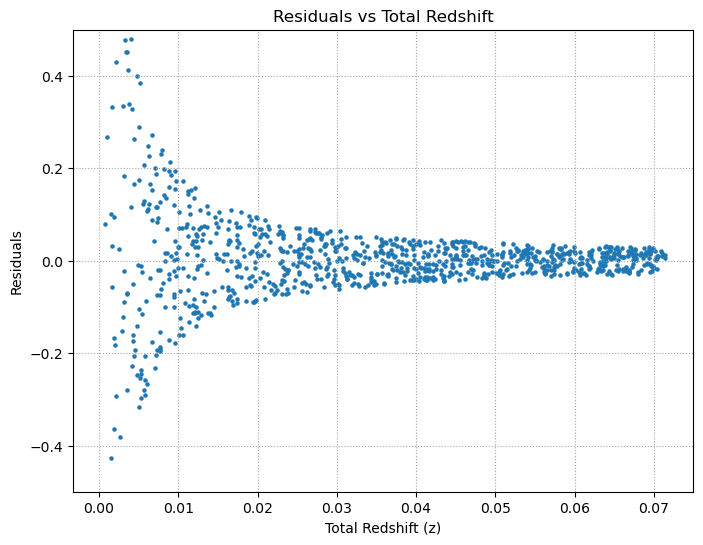

In [7]:
plt.figure(figsize=(8, 6))
#plt.xlim(0.0,0.1)
plt.ylim(-0.5,0.5)
plt.scatter(z_total, residuals, s=5)
plt.xlabel('Total Redshift (z)')
plt.ylabel('Residuals')
plt.title('Residuals vs Total Redshift')
plt.grid(visible=True, which='both', color='0.65',linestyle=':')
plt.savefig('peculiar_veolcoty_effect.png',dpi=360)
plt.show()

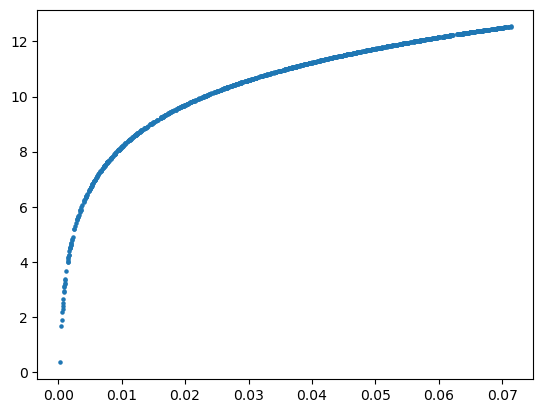

In [8]:
plt.scatter(z_total,mu_obs, s=5)
plt.show()